正在读取 JSON 文件，来源目录: d:\ComputerScience\VscodeProject\Teacher-Analysis\NUIST_teacher_data

已处理 171 个 JSON 文件。

准备绘制前 40 名教师的点赞数条形图...


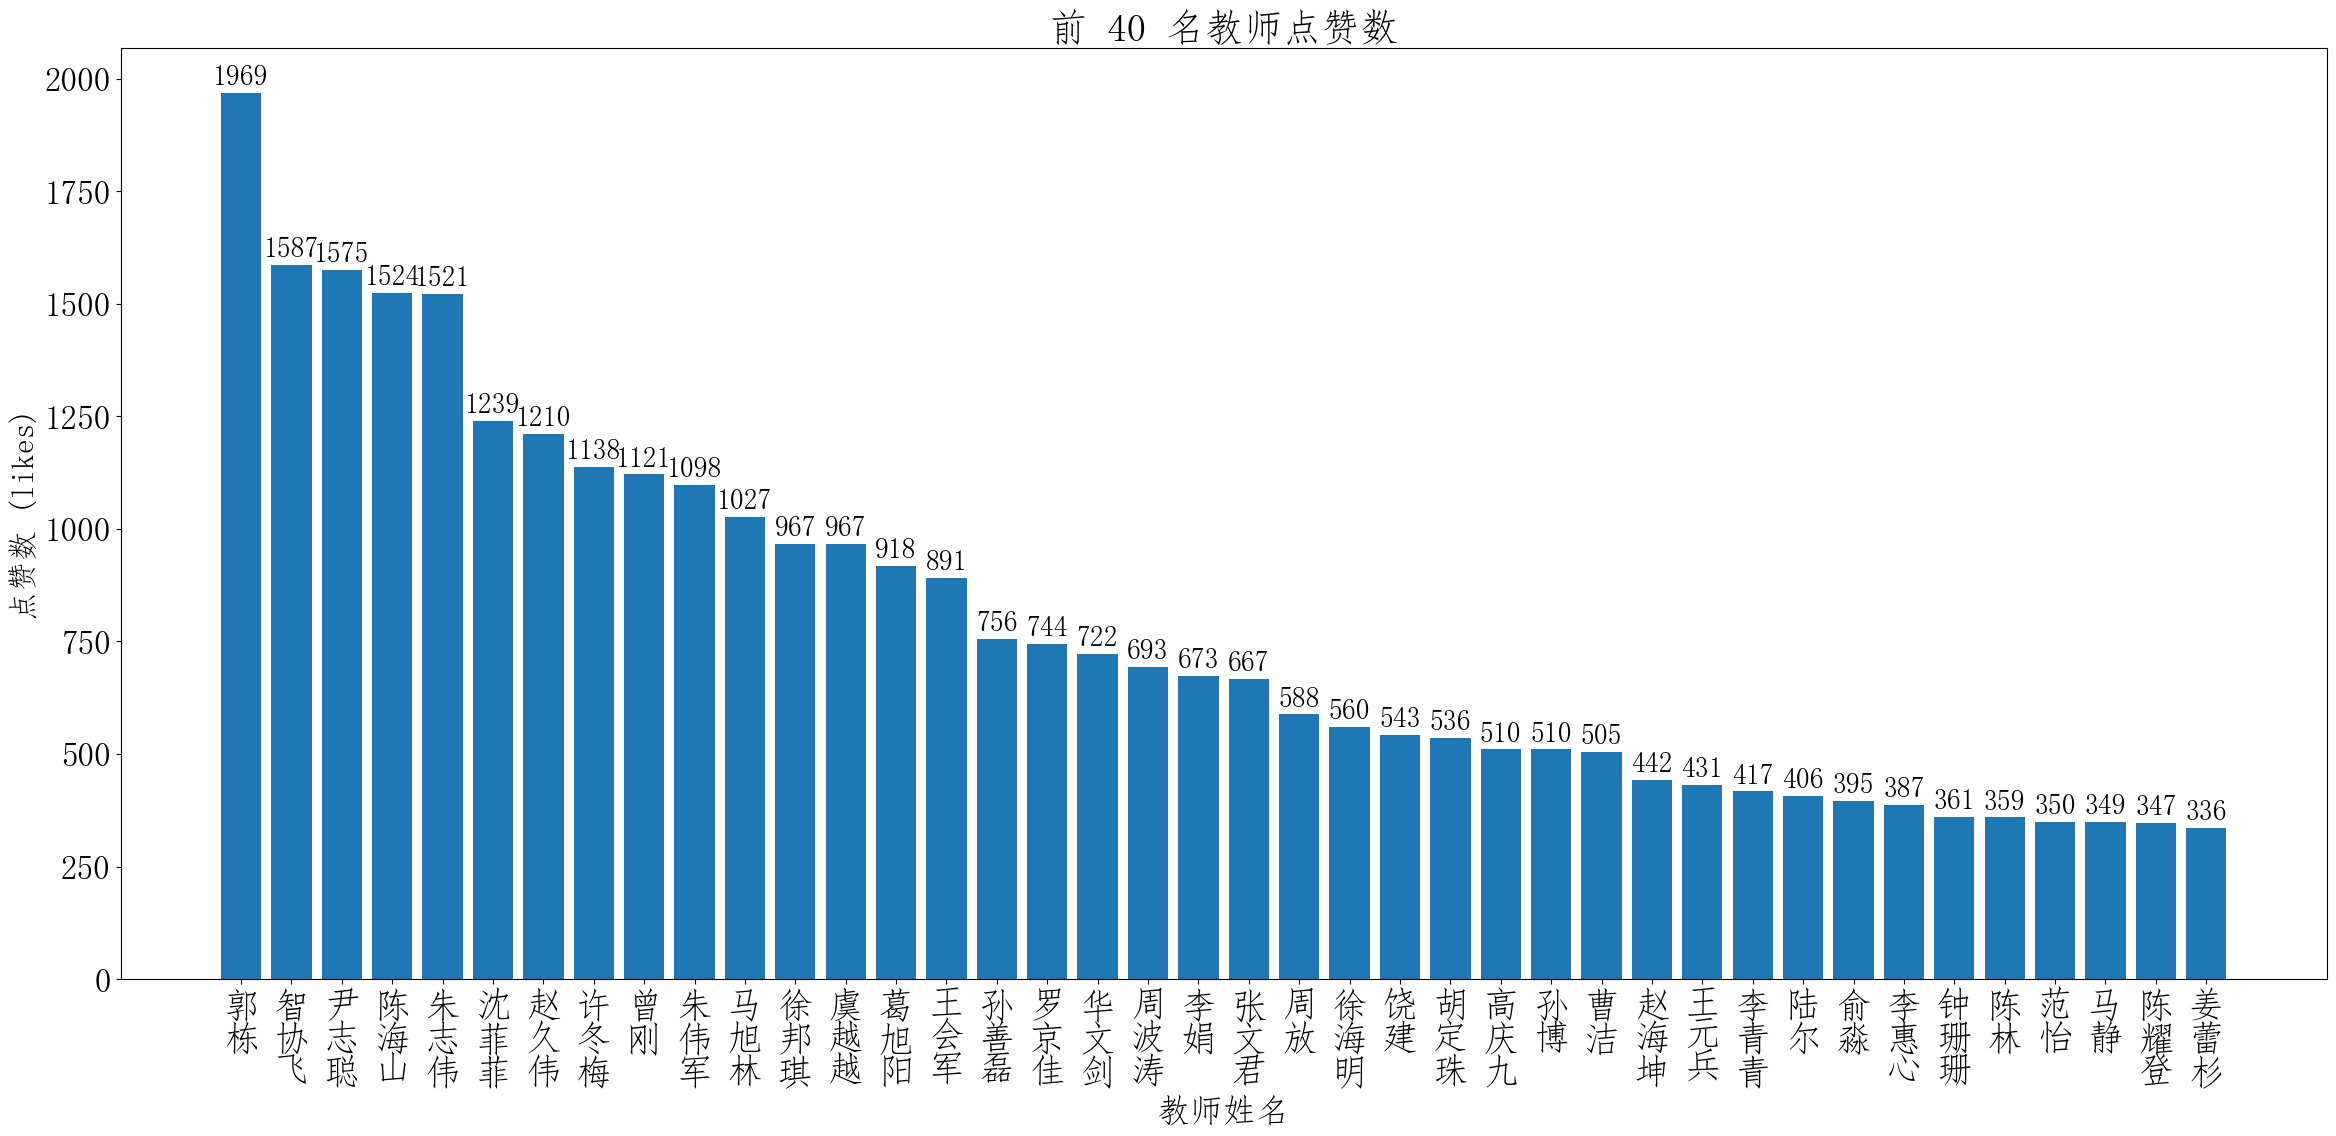

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# --- 配置区 ---
data_directory = 'NUIST_teacher_data'
top_n = 40
# --- 配置区结束 ---

results = []

# --- 读取数据  ---
print(f"正在读取 JSON 文件，来源目录: {os.path.abspath(data_directory)}")
for filename in os.listdir(data_directory):
    if filename.endswith('.json'):
        teacher_name = os.path.splitext(filename)[0]
        file_path = os.path.join(data_directory, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        likes_value = data.get('likes', None) if isinstance(data, dict) else None
        results.append({'teacher': teacher_name, 'likes': likes_value})

print(f"\n已处理 {len(results)} 个 JSON 文件。")

# --- 数据处理 (核心逻辑) ---
if results:
    df = pd.DataFrame(results)
    df['likes_numeric'] = pd.to_numeric(df['likes'], errors='coerce')
    df_numeric = df.dropna(subset=['likes_numeric'])
    df_numeric['likes_numeric'] = df_numeric['likes_numeric'].astype(int)
    df_sorted = df_numeric.sort_values(by='likes_numeric', ascending=False)
    df_top = df_sorted.head(top_n)

    # --- 绘图 ---
    if not df_top.empty:
        print(f"\n准备绘制前 {top_n} 名教师的点赞数条形图...")

        # --- 配置字体 ---
        plt.rcParams['font.sans-serif'] = ["FangSong"]
        plt.rcParams['axes.unicode_minus'] = False

        # --- 开始绘图 ---
        plt.figure(figsize=(24, 12))

        bars = plt.bar(df_top['teacher'], df_top['likes_numeric'])

        # --- 设置标题和标签，显著增大字号 ---
        plt.title(f'教师点赞数前 {top_n} 名', fontsize=28)  # 大标题
        plt.ylabel('点赞数 (likes)', fontsize=22)           # Y轴标签
        plt.xlabel('教师姓名', fontsize=24)               # X轴标签 (恢复显示)

        # --- 处理竖排文字刻度标签，并增大字号 ---
        vertical_labels = ['\n'.join(list(name)) for name in df_top['teacher']]

        plt.xticks(
            ticks=range(len(df_top['teacher'])),
            labels=vertical_labels,
            fontsize=26,        # 显著增大刻度字号
            linespacing=1.0     # 可以调整行间距
        )

        # --- 增大 Y 轴刻度字号 ---
        plt.yticks(fontsize=24)

        # --- 在条形图顶部显示加粗数值，并增大字号 ---
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2.0,
                yval + 10,          # 增加偏移量，避免与条形重叠
                int(yval),
                va='bottom',
                ha='center',
                fontsize=20,        # 增大数值字号
                fontweight='bold'
            )

        # 调整布局以适应更大的字体和标签
        plt.tight_layout(pad=3.0) # 增加更多 padding

        # 显示图形
        plt.show()

    else:
        print("\n没有找到有效的教师点赞数据用于绘图。")
else:
    print("\n未能加载任何数据，无法进行分析。")